In [65]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

## Step 1: Load Train, Validation, and Test Data

In [66]:
# Load Datasets
train_df = pd.read_csv("WDBC_Scaled_Train.csv")
valid_df = pd.read_csv("WDBC_Scaled_Validation.csv")
test_df = pd.read_csv("WDBC_Scaled_Test.csv")

In [67]:
train_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,0,-0.799622,-0.401333,-0.813271,-0.734430,-0.554912,-0.981940,-0.767295,-0.721285,-0.747656,...,-0.684773,1.680008,-0.673775,-0.644628,0.557506,-0.578383,-0.446222,-0.421232,0.128936,-0.326844
1,1,2.093430,0.691296,2.129022,2.085188,1.474288,2.056828,2.385939,2.782467,1.337626,...,2.034789,0.479335,1.900942,2.058261,0.767815,1.999709,2.085470,2.010414,1.483649,0.918585
2,0,-0.294397,-0.918651,-0.288724,-0.345025,-0.175339,-0.359810,0.043526,-0.362876,0.073818,...,-0.329868,-0.825883,-0.300585,-0.374287,0.664807,-0.179235,0.132368,-0.260814,1.516923,0.148829
3,0,-1.272954,0.009272,-1.281354,-1.053849,-0.819747,-1.037218,-0.822844,-1.016330,-0.825715,...,-1.122214,-0.019626,-1.146779,-0.916875,-0.532663,-0.998558,-0.869297,-1.181337,-0.538122,-0.233102
4,1,2.079318,0.716814,2.030823,2.286749,1.062963,0.244154,1.923858,2.334132,-0.283021,...,1.873844,0.108678,1.726194,1.964682,0.372950,-0.269264,0.662661,1.687698,-1.317676,-0.664315


## Step 2: Prepare Input Feature Vectors and Target Labels

In [68]:
# Separate features and target labels
X_train, y_train = train_df.iloc[:, 1:], train_df.iloc[:, 0]
X_valid, y_valid = valid_df.iloc[:, 1:], valid_df.iloc[:, 0]
X_test, y_test = test_df.iloc[:, 1:], test_df.iloc[:, 0]

# Print dataset shapes
print('Train shape:', X_train.shape)
print('Validation shape:', X_valid.shape)
print('Test shape:', X_test.shape)

Train shape: (341, 30)
Validation shape: (114, 30)
Test shape: (114, 30)


In [69]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [70]:
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1,1)
X_valid, y_valid = torch.tensor(X_valid, dtype=torch.float32), torch.tensor(y_valid, dtype=torch.float32).view(-1,1)
X_test, y_test = torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32).view(-1,1)

### Neuron Network

In [71]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_layers):
        super(NeuralNet, self).__init__()
        layers = []
        prev_size = input_size
        for layer_size in hidden_layers:
            layers.append(nn.Linear(prev_size, layer_size))
            layers.append(nn.Sigmoid())
            prev_size = layer_size
        layers.append(nn.Linear(prev_size, 1))
        layers.append(nn.Sigmoid())
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

### Evaluation Metrics

In [72]:
def evaluate_model(X, y):
    y_pred = model(X).detach().numpy()
    y_pred = (y_pred > 0.5).astype(int)
    y_true = y.numpy()
    
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))

Training complete!
------------------------ [10] -----------------------------------------
Validation Performance:
Confusion Matrix:
 [[71  0]
 [26 17]]
Accuracy: 0.7719298245614035
Precision: 1.0
Recall: 0.3953488372093023
F1 Score: 0.5666666666666667
-----------------------------------------------------------------
Test Performance:
Confusion Matrix:
 [[72  0]
 [30 12]]
Accuracy: 0.7368421052631579
Precision: 1.0
Recall: 0.2857142857142857
F1 Score: 0.4444444444444444
-----------------------------------------------------------------
Training complete!
------------------------ [100] -----------------------------------------
Validation Performance:
Confusion Matrix:
 [[71  0]
 [42  1]]
Accuracy: 0.631578947368421
Precision: 1.0
Recall: 0.023255813953488372
F1 Score: 0.045454545454545456
-----------------------------------------------------------------
Test Performance:
Confusion Matrix:
 [[72  0]
 [40  2]]
Accuracy: 0.6491228070175439
Precision: 1.0
Recall: 0.047619047619047616
F1 Scor

/home/user/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/user/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/user/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/user/.local/lib/python3.10/site-packages/sklea

Training complete!
------------------------ [256, 64] -----------------------------------------
Validation Performance:
Confusion Matrix:
 [[71  0]
 [43  0]]
Accuracy: 0.6228070175438597
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
-----------------------------------------------------------------
Test Performance:
Confusion Matrix:
 [[72  0]
 [42  0]]
Accuracy: 0.631578947368421
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
-----------------------------------------------------------------
Training complete!
------------------------ [512, 128] -----------------------------------------
Validation Performance:
Confusion Matrix:
 [[71  0]
 [43  0]]
Accuracy: 0.6228070175438597
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
-----------------------------------------------------------------
Test Performance:
Confusion Matrix:
 [[72  0]
 [42  0]]
Accuracy: 0.631578947368421
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
-----------------------------------------------------------------


/home/user/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/user/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


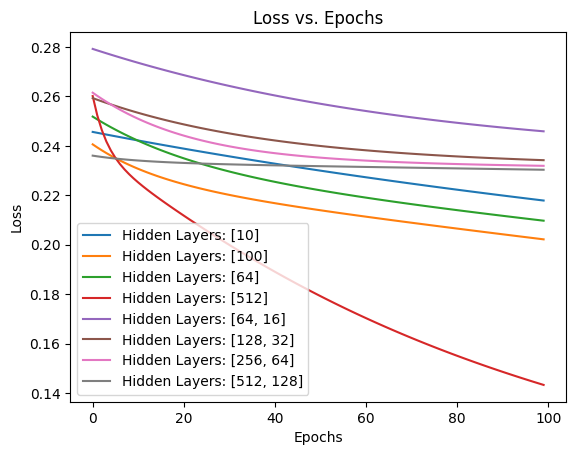

In [73]:
hidden_layers_list = [[10], [100], [64], [512], [64,16], [128, 32], [256, 64], [512, 128]]
for layer in hidden_layers_list:
    model = NeuralNet(input_size=30, hidden_layers=layer)
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01)
    epochs = 100
    loss_history = []
    for epoch in range(epochs):
        optimizer.zero_grad()
    
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
    
        loss.backward()
        optimizer.step()
        loss_history.append(loss.item())
    print("Training complete!")
    print("------------------------",layer,"-----------------------------------------")
    plt.plot(range(epochs), loss_history, label=f"Hidden Layers: {layer}")
    print("Validation Performance:")
    evaluate_model(X_valid, y_valid)
    print("-----------------------------------------------------------------")
    print("Test Performance:")
    evaluate_model(X_test, y_test)
    print("-----------------------------------------------------------------")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs. Epochs")
plt.legend()
plt.show()